In [1]:
from tensorflow import keras

fasion_mnist = keras.datasets.fashion_mnist

In [2]:
import tensorflow as tf

In [3]:
import pickle
import os

In [4]:
if os.path.exists("fasion_mnist.pickle"):
    with open("fasion_mnist.pickle", "rb") as f:
        fasion_mnist = pickle.load(f)
else:
    fasion_mnist = fasion_mnist.load_data()
    with open("fasion_mnist.pickle", "wb") as f:
        pickle.dump(fasion_mnist, f)

In [5]:
(train_images, train_labels), (test_images, test_labels) = fasion_mnist

In [6]:
import matplotlib.pyplot as plt

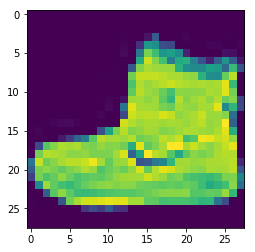

In [7]:
plt.imshow(train_images[:1, :][0])

In [15]:
model = tf.keras.Sequential()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),      # 입력 레이어
    keras.layers.Dense(128, activation=tf.nn.relu),  # 은닉 레이어
    keras.layers.Dense(10, activation=tf.nn.softmax) # 출력 레이어
])

In [17]:
# model.summary()를 통해 모델을 살펴보세요.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 45us/sample - loss: 3.1257 - acc: 0.6883
Epoch 2/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.7309 - acc: 0.7276
Epoch 3/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.6433 - acc: 0.7638
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5766 - acc: 0.7953
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.5483 - acc: 0.8063


In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.5641 - acc: 0.8139
Test accuracy: 0.8139
